# Ridge and Lasso Regression: Upgrading Regression Methods

by Kyoosik Kim  

### Demonstration with Sample Data  
We will implement Ridge Regression and Lasso Regression to the widely known data set Boston House Price to look into the properties of the regression methods. We should standardize the scale for the assumption of Ridge Regression and Lasso Regression.  

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [25]:
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [26]:
# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

#### - Linear Regression with OLS Method

In [27]:
ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
ols_pred = ols_reg.predict(X_test)

pd.DataFrame({'variable': house_price.feature_names, 'estimate': ols_reg.coef_})

,variable,estimate
0,CRIM,-1.321404
1,ZN,1.514832
2,INDUS,-0.166266
3,CHAS,0.411579
4,NOX,-1.771168
5,RM,2.352821
6,AGE,0.318499
7,DIS,-3.256645
8,RAD,2.632576
9,TAX,-2.059466


For the sake of observing the shrinkage, we would want to choose a few variables to plot them with different lambda values. The below will be chosen.  

- RM / ZN / AGE / CRIM / TAX

#### - Ridge Regression

In [28]:
house_price.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

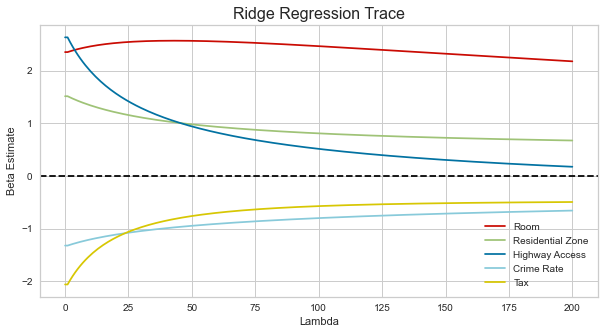

In [29]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

alphas = np.arange(0, 200, 1)

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))
    
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').reset_index()#.rename_axis(None, 1).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)


As a $\lambda$ increases, the lines representing the features are converging to zero. These lines are $\beta$'s and they are same as OLS model's coefficients at lambda zero because of no penalty. While the feature "Room" stays quite the same, "Tax" gets close to zero quickly. This is suggestive of each feature's importance. Note that the lines will never hit zero, but only converges to it.



#### - Lasso Regression

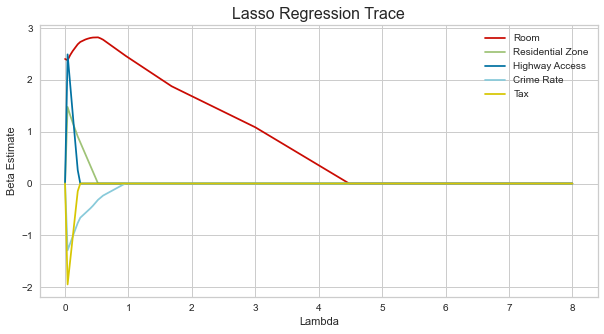

In [30]:
# initialize
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)
lasso_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': lasso_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

alphas = np.arange(0.01, 8.01, 0.04)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    # prediction
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))

lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.RM, 'r', lasso_df.ZN, 'g', lasso_df.RAD, 'b', lasso_df.CRIM, 'c', lasso_df.TAX, 'y')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

Unlike Ridge Regression, the $\beta$'s hit zero, which means some features get cast out after a certain point. Recalling the equation, This is why Lasso Regression has an advantage in feature selection. As with Ridge Regression, "Room" survives longer than others and "Tax" becomes null almost upon the iteration.

#### - Analysis

We started with the main idea of Bias vs. Variance. The core of this is to see how a model gets overfitted or underfitted as the model becomes more or less complex. We can experiment these by observing R-squared and Mean Squared Error. Controlling a model complexity should be done by adding or removing variables, but we can do the job simply by changing lambdas for Ridge and Lasso Regression, which is already done above. This is fair because the lambda makes the models more complex or less, and this is what these models are designed for.

Text(0.5, 0, 'Model Simplicity$\\longrightarrow$')

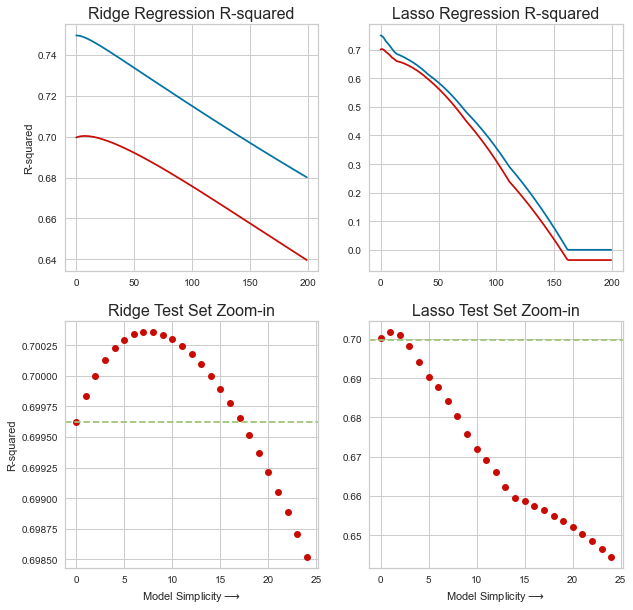

In [31]:
# R-squared of training set
ridge_r_squared_train = [r2_score(y_train, p) for p in ridge_train_pred]
lasso_r_squared_train = [r2_score(y_train, p) for p in lasso_train_pred]

# R-squared of test set
ridge_r_squared_test = [r2_score(y_test, p) for p in ridge_test_pred]
lasso_r_squared_test = [r2_score(y_test, p) for p in lasso_test_pred]

# ols for benchmark
ols_r_squared = r2_score(y_test, ols_pred)

# plot R-squared of training and test
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes[0,0].plot(ridge_r_squared_train, 'b', ridge_r_squared_test, 'r')
axes[0,0].set_title("Ridge Regression R-squared", fontsize=16)
axes[0,0].set_ylabel("R-squared")

axes[0,1].plot(lasso_r_squared_train, 'b', lasso_r_squared_test, 'r')
axes[0,1].set_title("Lasso Regression R-squared", fontsize=16)

# test set curve
axes[1,0].plot(ridge_r_squared_test[:25], 'ro')
axes[1,0].axhline(y=ols_r_squared, color='g', linestyle='--')
axes[1,0].set_title("Ridge Test Set Zoom-in", fontsize=16)
axes[1,0].set_xlabel("Model Simplicity$\longrightarrow$")
axes[1,0].set_ylabel("R-squared")

axes[1,1].plot(lasso_r_squared_test[:25], 'ro')
axes[1,1].axhline(y=ols_r_squared, color='g', linestyle='--')
axes[1,1].set_title("Lasso Test Set Zoom-in", fontsize=16)
axes[1,1].set_xlabel("Model Simplicity$\longrightarrow$")

We see the R-squared of test set is located below the R-squared of training set for both the regression. This is natural because the training set R-squared is calculated based on itself while the test set R-squared is based on the model made from training set.  
Another point is that the training set R-squared constantly declines as the model gets simpler. Understanding it reversely, we know that training set R-squared should increase as we add more variables, which is called overfitting. From the bottome plots, however, it seems like the test set R-squared improves as the model becomes simpler. Recalling the definition of overfitting, a simpler model is good for new observations, the test set here.  

Text(0.5, 0, 'Model Simplicity$\\longrightarrow$')

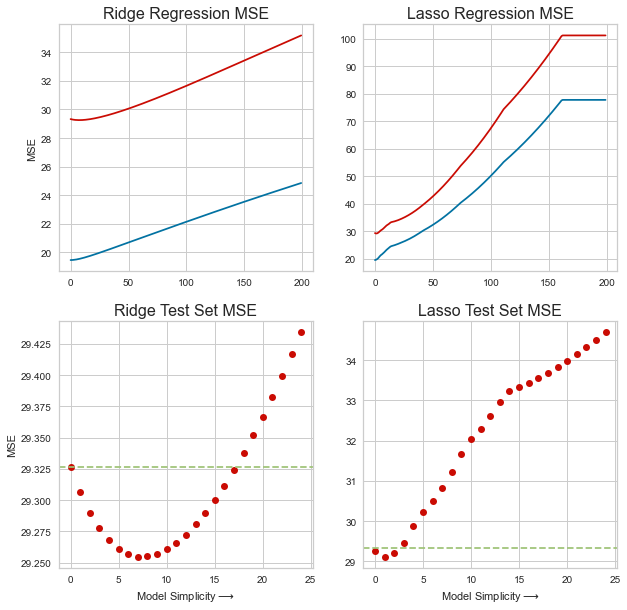

In [32]:
# MSE of training set
ridge_mse_train = [mean_squared_error(y_train, p) for p in ridge_train_pred]
lasso_mse_train = [mean_squared_error(y_train, p) for p in lasso_train_pred]

# MSE of test set
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
lasso_mse_test = [mean_squared_error(y_test, p) for p in lasso_test_pred]

# ols mse for benchmark
ols_mse = mean_squared_error(y_test, ols_pred)

# plot MSE of training and test
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes[0,0].plot(ridge_mse_train, 'b', ridge_mse_test, 'r')
axes[0,0].set_title("Ridge Regression MSE", fontsize=16)
axes[0,0].set_ylabel("MSE")

axes[0,1].plot(lasso_mse_train, 'b', lasso_mse_test, 'r')
axes[0,1].set_title("Lasso Regression MSE", fontsize=16)

# test set curve
axes[1,0].plot(ridge_mse_test[:25], 'ro')
axes[1,0].axhline(y=ols_mse, color='g', linestyle='--')
axes[1,0].set_title("Ridge Test Set MSE", fontsize=16)
axes[1,0].set_xlabel("Model Simplicity$\longrightarrow$")
axes[1,0].set_ylabel("MSE")

axes[1,1].plot(lasso_mse_test[:25], 'ro')
axes[1,1].axhline(y=ols_mse, color='g', linestyle='--')
axes[1,1].set_title("Lasso Test Set MSE", fontsize=16)
axes[1,1].set_xlabel("Model Simplicity$\longrightarrow$")

These plots can be explained in the same way of the R-squared plots, but in the opposite direction. MSE is one of indicators to measure errors. As we see, the test set MSE has the lowest point. In the next, we will find the lambda for this lowest point. Note that the lambda to be found won't not be the point on the plot above, because we are not trying for a test set specific lambda. We will find the lambda for a general model, but it would be similar with the lambda seen on the bottom plot.

### Finding Best Fit Lambda

Since we now understand how it works, it would be wise to use libraries already built. We can think of GridSearchCV, judging from the pattern of problem that we should change values for a certain parameter, lambda here. In addition, there is another library called RidgeCV and LassoCV. From their names, they basically do the same job to loop through values and find the optimal value.

###### - GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# ols for comparison
print("OLS R-squared:", round(ols_r_squared, 4))
print("OLS MSE:", round(ols_mse, 4))

OLS R-squared: 0.6996
OLS MSE: 29.3266


In [35]:
param = {'alpha': np.arange(0.01, 10, 0.01)}

ridge_reg_grid = GridSearchCV(Ridge(), param)
ridge_reg_grid.fit(X_train, y_train)
ridge_grid_pred = ridge_reg_grid.predict(X_test)

print(ridge_reg_grid.best_estimator_)
print("\nR-Squared:", round(r2_score(y_test, ridge_grid_pred), 4))
print("MSE:", round(mean_squared_error(y_test, ridge_grid_pred), 4))

Ridge(alpha=2.63)

R-Squared: 0.7001
MSE: 29.2817


In [36]:
lasso_reg_grid = GridSearchCV(Lasso(), param)
lasso_reg_grid.fit(X_train, y_train)
lasso_grid_pred = lasso_reg_grid.predict(X_test)

print(lasso_reg_grid.best_estimator_)
print("\nR-Squared:", round(r2_score(y_test, lasso_grid_pred), 4))
print("MSE:", round(mean_squared_error(y_test, lasso_grid_pred), 4))

Lasso(alpha=0.01)

R-Squared: 0.7003
MSE: 29.2632


#### - RidgeCV with Visualization

In [37]:
#!pip install yellowbrick
#from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection # visualization
# import yellowbrick

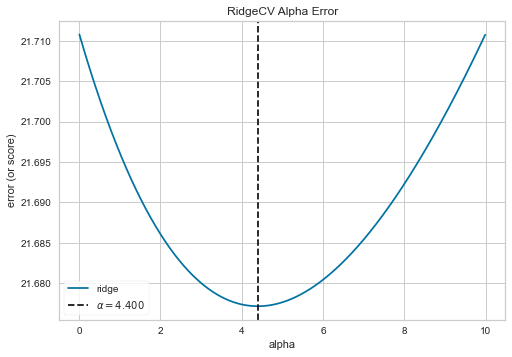

R-squared: 0.7003


In [38]:
from sklearn.linear_model import RidgeCV
alphas=np.arange(0.01, 10, 0.01)
#ridgeCV_reg = RidgeCV(alphas=alphas)
#ridgeCV_reg.fit(X_train, y_train)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))

visualizer.fit(X_train, y_train)
g = visualizer.poof()

ridgeCV_pred = visualizer.predict(X_test)
print("R-squared:", round(r2_score(y_test, ridgeCV_pred), 4))

Even if R-squared is virtually the same with the one we found through GridSearchCV, the lambda is slightly different because the setup of RidgeCV is different. The detail can be found at the sklearn website.

#### Reference
- Overview and Math: Penn State Stat Class
- Linear vs. Ridge Image: IPython Cookbook
- Linear Models: sklearn Generalized Linear Models
- RidgeCV and LassoCV: sklearn RidgeCV
- Grid Search Closs Validation: sklearn GridSearchCV
- Alpha Selection: scikit yellowbrick
- Other: Derek Kane's Lecture Note